<a href="https://colab.research.google.com/github/renaldfredy/Thesis/blob/main/Recurrent%20Approach/CNN_LSTM_AT_Trial_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN_LSTM_AT

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_name = 'ConvLSTM_AT'
Timelag = 12

In [ ]:
# !pip install -q -U keras-tuner

In [ ]:
pip install attention -q

In [ ]:
pip install keras-multi-head -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import LSTM, SimpleRNN, Bidirectional, GRU, Conv1D, GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout, Embedding, TimeDistributed, concatenate
from tensorflow.keras.metrics import RootMeanSquaredError
from keras.initializers import RandomNormal
from keras.callbacks import ModelCheckpoint, EarlyStopping
# from keras.layers import Conv1D, MaxPooling2D
from keras import Model
from keras.layers import Layer
import keras.backend as K
from keras.models import model_from_json
# from keras_tuner.tuners import RandomSearch, BayesianOptimization
# from keras_tuner.engine.hyperparameters import HyperParameters
import warnings
import pickle
warnings.filterwarnings("ignore")

In [ ]:
seed_value= 1

# Set the `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

# Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
np.random.seed(42)

# Set the `tensorflow` pseudo-random generator at a fixed value
import tensorflow
tensorflow.random.set_seed(seed_value)

print(tensorflow.random.uniform([42]).numpy())

[0.16513085 0.9014813  0.6309742  0.4345461  0.29193902 0.64250207
 0.9757855  0.43509948 0.6601019  0.60489583 0.6366315  0.6144488
 0.8893349  0.6277617  0.53197503 0.02597821 0.44087505 0.25267076
 0.8862232  0.88729346 0.78728163 0.05955195 0.0710938  0.3084147
 0.25118268 0.9084705  0.47147965 0.24238515 0.63300395 0.5860311
 0.910012   0.5701437  0.49643457 0.5939151  0.5414331  0.44291723
 0.2924806  0.73394465 0.91970384 0.66851854 0.21609557 0.18653381]


In [ ]:
# trying open dataset

pickle_in_tr_0 =open("/content/drive/MyDrive/Renald/Preprosessing_data/Data_Train_0_3D.pickle",'rb')
Xtrain_0 = pickle.load(pickle_in_tr_0)

pickle_in_val_0 =open("/content/drive/MyDrive/Renald/Preprosessing_data/Data_Val_0_3D.pickle",'rb')
Xval_0 = pickle.load(pickle_in_val_0)

pickle_in_ts_0 =open("/content/drive/MyDrive/Renald/Preprosessing_data/Data_Test_0_3D.pickle",'rb')
Xtest_0 = pickle.load(pickle_in_ts_0)

# print(Xtrain_0)
print(Xtrain_0.shape)
print(Xval_0.shape)
print(Xtest_0.shape)

(288, 779, 9)
(96, 779, 9)
(96, 779, 9)


In [ ]:
Xtrain_0_transpose = np.transpose(Xtrain_0, (1, 0, 2))
Xval_0_transpose = np.transpose(Xval_0, (1, 0, 2))
Xtest_0_transpose = np.transpose(Xtest_0, (1, 0, 2))
Xtrain_0_transpose.shape

(779, 288, 9)

In [ ]:
all_data = np.hstack((Xtrain_0_transpose,Xval_0_transpose,Xtest_0_transpose))

all_data.shape

(779, 480, 9)

In [ ]:
pd.DataFrame(all_data[0]).head(15)

,0,1,2,3,4,5,6,7,8
0,467.086792,450.509216,450.493469,463.481934,463.987152,463.586304,464.221161,454.073120,455.535645
1,329.553650,332.110718,325.165436,323.138031,323.946747,319.100983,314.429291,315.854004,303.505096
2,191.304688,194.310349,203.168213,202.327225,205.625854,213.830566,176.942657,181.324371,209.248688
3,256.511261,251.699554,267.314087,243.805115,245.511902,236.010803,235.431396,237.056396,260.986267
4,279.643127,282.230225,272.270935,316.828491,316.661316,316.682556,312.520203,317.095947,324.420502
5,307.906799,317.287048,322.728668,324.538788,340.247498,299.962311,269.737976,280.043182,255.843201
6,276.002838,271.639465,270.517883,289.815277,285.368927,280.642517,289.259216,286.155457,247.657745
7,158.347504,155.264359,145.810822,139.594055,136.844742,130.358826,115.160339,112.121460,99.258423
8,438.333496,444.230103,408.436035,418.862854,424.856354,378.957397,385.197113,391.942841,348.880249
9,409.619232,397.067383,398.271423,350.422211,341.599182,389.730804,325.846466,318.161255,357.823364


#Visualizing Target

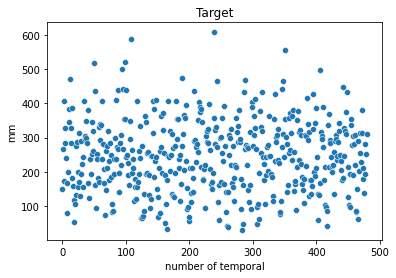

In [ ]:
import seaborn as sns
# load dataset
dataset = all_data[479].copy()
values = dataset
# specify columns to plot
groups = [4]
i = 1
# plot each column
plt.figure()
for group in groups:
  plt.subplot(len(groups), 1, i)
  # plt.plot(values[:, group])
  sns.scatterplot(range(len(values[:, group])), values[:, group])
  plt.title('Target')
  plt.xlabel('number of temporal')
  plt.ylabel('mm')
  i += 1
plt.show()

In [ ]:

Target = all_data[:,:,[4]].reshape(779,480,1)
Target.shape

(779, 480, 1)

In [ ]:
d = all_data[:,:-1,:]
T = Target[:,1:,:]
merging_data = np.dstack((d, T))
merging_data.shape

(779, 479, 10)

In [ ]:
j = all_data[:,:-1,:]
k = Target[:,1:,:]
merge_data = np.dstack((d, T))
merge_data.shape

(779, 479, 10)

In [ ]:
merge = pd.DataFrame(merge_data[0]).drop(4,axis=1)
np.shape(merge)

(479, 9)

In [ ]:
merge

,0,1,2,3,5,6,7,8,9
0,467.086792,450.509216,450.493469,463.481934,463.586304,464.221161,454.073120,455.535645,323.946747
1,329.553650,332.110718,325.165436,323.138031,319.100983,314.429291,315.854004,303.505096,205.625854
2,191.304688,194.310349,203.168213,202.327225,213.830566,176.942657,181.324371,209.248688,245.511902
3,256.511261,251.699554,267.314087,243.805115,236.010803,235.431396,237.056396,260.986267,316.661316
4,279.643127,282.230225,272.270935,316.828491,316.682556,312.520203,317.095947,324.420502,340.247498
...,...,...,...,...,...,...,...,...,...
474,215.362259,220.084747,220.066437,221.347260,220.921188,225.244095,228.886383,219.776276,163.409225
475,178.041290,168.478027,162.583588,165.195450,161.273102,150.200577,147.437241,130.647644,336.403229
476,326.390259,326.232483,323.531799,330.739868,317.736694,316.792603,323.693359,306.447693,275.805267
477,284.119263,282.079559,265.485229,282.309448,264.850494,281.646545,280.248901,254.388306,313.046967


In [ ]:
co = merge.corr()
co[9]

0    0.347344
1    0.347265
2    0.344629
3    0.340643
5    0.335638
6    0.329338
7    0.330668
8    0.322523
9    1.000000
Name: 9, dtype: float64

In [ ]:
corelation = pd.DataFrame(all_data[0]).corr()
corelation[4]

0    0.985935
1    0.987058
2    0.983753
3    0.996816
4    1.000000
5    0.990686
6    0.982669
7    0.987019
8    0.973987
Name: 4, dtype: float64

In [ ]:
corrMatrix = pd.DataFrame(merging_data[0]).corr()
corrMatrix[9]

0    0.347344
1    0.347265
2    0.344629
3    0.340643
4    0.340190
5    0.335638
6    0.329338
7    0.330668
8    0.322523
9    1.000000
Name: 9, dtype: float64

In [ ]:
np.argwhere(np.isnan(all_data))

array([], shape=(0, 3), dtype=int64)

In [ ]:
np.shape(all_data)

(779, 480, 9)

In [ ]:
df1 = pd.DataFrame(all_data[0])
df_ =df1[0].iloc[1:]

df_

1      329.553650
2      191.304688
3      256.511261
4      279.643127
5      307.906799
          ...    
475    178.041290
476    326.390259
477    284.119263
478    321.845520
479    399.726624
Name: 0, Length: 479, dtype: float64

In [ ]:
# assigning a new variable
# df2 = df1.copy().drop(columns='Target', axis=1)
df2 = []

for h in range(len(all_data)):
  df1 = pd.DataFrame(all_data[h])
  # df_ =df1.iloc[1:]
  df2.append(df1)

In [ ]:
np.shape(df2)

(779, 480, 9)

In [ ]:
type(df2[0])

pandas.core.frame.DataFrame

In [ ]:
past_month = Timelag

def TimeLagTransform(data, past_month):
  cols = data.columns
  for i in reversed(range(past_month)):
    for j in cols:
      data['%s(t-%d)'%(j,i+1)] = data[j].shift(periods=i)
  return data



In [ ]:
# calling function

df2_all = []
for i in range(len(all_data)):
  df3 = TimeLagTransform(data=df2[i].copy(), past_month=past_month).drop(columns=df2[i].columns, axis=1).dropna()
  df4 = df3.iloc[:-1]
  df2_all.append(df4)

In [ ]:
df2_all[0]

,0(t-12),1(t-12),2(t-12),3(t-12),4(t-12),5(t-12),6(t-12),7(t-12),8(t-12),0(t-11),...,8(t-2),0(t-1),1(t-1),2(t-1),3(t-1),4(t-1),5(t-1),6(t-1),7(t-1),8(t-1)
11,467.086792,450.509216,450.493469,463.481934,463.987152,463.586304,464.221161,454.073120,455.535645,329.553650,...,339.820374,301.535706,292.578583,303.917816,299.749207,301.513489,312.693787,289.492920,282.004944,286.224670
12,329.553650,332.110718,325.165436,323.138031,323.946747,319.100983,314.429291,315.854004,303.505096,191.304688,...,286.224670,355.790009,342.387360,347.182312,373.976685,358.759521,354.760132,416.243347,396.517090,433.099274
13,191.304688,194.310349,203.168213,202.327225,205.625854,213.830566,176.942657,181.324371,209.248688,256.511261,...,433.099274,275.548248,277.775208,273.088562,261.197693,262.917816,280.585144,260.060547,263.377502,239.457077
14,256.511261,251.699554,267.314087,243.805115,245.511902,236.010803,235.431396,237.056396,260.986267,279.643127,...,239.457077,326.940582,329.795227,329.939301,328.907806,330.073700,323.615295,334.714844,336.267761,316.371735
15,279.643127,282.230225,272.270935,316.828491,316.661316,316.682556,312.520203,317.095947,324.420502,307.906799,...,316.371735,436.349182,428.748260,448.847565,397.710999,401.394165,448.389465,434.760437,439.022705,486.146729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,135.717133,126.127258,126.429482,118.929840,118.850075,115.907265,109.592224,109.402756,100.114601,250.363647,...,227.918427,215.362259,220.084747,220.066437,221.347260,223.238129,220.921188,225.244095,228.886383,219.776276
475,250.363647,260.808624,235.540710,255.817947,254.871185,257.008331,243.025879,249.374527,254.348053,200.156586,...,219.776276,178.041290,168.478027,162.583588,165.195450,163.409225,161.273102,150.200577,147.437241,130.647644
476,200.156586,198.505005,187.546982,196.690765,193.657593,182.953918,194.678925,190.160553,175.391434,355.850922,...,130.647644,326.390259,326.232483,323.531799,330.739868,336.403229,317.736694,316.792603,323.693359,306.447693
477,355.850922,345.981964,340.183258,350.101624,341.115417,340.635010,363.458679,345.540588,339.475342,299.799713,...,306.447693,284.119263,282.079559,265.485229,282.309448,275.805267,264.850494,281.646545,280.248901,254.388306


In [ ]:
pd.DataFrame(Target[0]).head(15)

,0
0,463.987152
1,323.946747
2,205.625854
3,245.511902
4,316.661316
5,340.247498
6,285.368927
7,136.844742
8,424.856354
9,341.599182


#Splitting Data

##Dealing with Input Data


In [ ]:
# converting into numpy array
X_train = []
X_val = []
X_test = []

for l in range(len(all_data)):
  values = df2_all[l].values
  panjang = len(df2_all[0])
  # splitting train-val-test
  train = values[:round(3/5*panjang),:]
  val = values[round(3/5*panjang):round(4/5*panjang),:]
  test = values[round(4/5*panjang):,:]
  X_train.append(train)
  X_val.append(val)
  X_test.append(test)




In [ ]:
print(np.shape(X_train))
print(np.shape(X_val))
print(np.shape(X_test))

(779, 281, 108)
(779, 93, 108)
(779, 94, 108)


##Dealing with Target Data

In [ ]:
# delete 11 row
new_target = []

for n in range(len(all_data)):
  df_target = pd.DataFrame(Target[n].copy())
  df_target1 = df_target.iloc[(past_month):]
  new_target.append(df_target1)


In [ ]:
new_target[0]

,0
12,358.759521
13,262.917816
14,330.073700
15,401.394165
16,287.891388
...,...
475,163.409225
476,336.403229
477,275.805267
478,313.046967


In [ ]:
np.shape(new_target)

(779, 468, 1)

In [ ]:
y_train = []
y_val = []
y_test = []

for l in range(len(all_data)):
  values = new_target[l].values
  panjang = len(new_target[0])
  # splitting train-val-test
  ytrain = values[:round(3/5*panjang),:].reshape(round(3/5*panjang))
  yval = values[round(3/5*panjang):round(4/5*panjang),:].reshape((round(4/5*panjang))-(round(3/5*panjang)))
  ytest = values[round(4/5*panjang):,:].reshape(panjang-(round(4/5*panjang)))
  y_train.append(ytrain)
  y_val.append(yval)
  y_test.append(ytest)

In [ ]:
print(np.shape(y_train))
print(np.shape(y_val))
print(np.shape(y_test))

(779, 281)
(779, 93)
(779, 94)


#Normalization

In [ ]:
# calling function into a variable
scaler = StandardScaler()
# applying normalization
xtrain_norm = []
xval_norm = []
xtest_norm = []

for o in range(len(all_data)):
  xtrain, xval, xtest = scaler.fit_transform(X_train[o]), scaler.transform(X_val[o]), scaler.transform(X_test[o])
  xtrain_norm.append(xtrain)
  xval_norm.append(xval)
  xtest_norm.append(xtest)

# assigning values into dataframe
df_xtrain = pd.DataFrame(data=xtrain, columns=df2_all[0].columns)
df_xval = pd.DataFrame(data=xval, columns=df2_all[0].columns)
df_xtest = pd.DataFrame(data=xtest, columns=df2_all[0].columns)

df_xtrain

,0(t-12),1(t-12),2(t-12),3(t-12),4(t-12),5(t-12),6(t-12),7(t-12),8(t-12),0(t-11),...,8(t-2),0(t-1),1(t-1),2(t-1),3(t-1),4(t-1),5(t-1),6(t-1),7(t-1),8(t-1)
0,0.298165,0.322646,0.331771,0.338140,0.337732,0.347445,0.363705,0.347189,0.357144,0.043430,...,0.196887,1.323682,1.343967,1.378598,1.443200,1.390715,1.417105,1.428862,1.369619,1.393996
1,0.039226,0.033592,0.041289,0.052442,0.036296,0.046585,0.058288,0.054111,0.049516,-0.274976,...,1.392056,0.565034,0.638696,0.627018,0.572969,0.651605,0.644258,0.721577,0.614753,0.606606
2,-0.279584,-0.232328,-0.268081,-0.436062,-0.427041,-0.460539,-0.491852,-0.577187,-0.601293,0.941696,...,0.604397,2.353427,2.127907,2.087896,2.207866,2.109935,2.058602,1.916759,1.961530,1.923987
3,0.938632,0.632493,0.607055,0.550756,0.483279,0.447956,0.250384,0.413908,0.411716,0.362270,...,1.922228,1.072676,0.986762,1.025808,1.032257,0.926592,0.951237,1.048744,1.013963,1.017232
4,0.358471,0.798565,0.767570,0.311700,0.648771,0.624697,0.039083,0.186180,0.155393,0.438790,...,1.015162,1.300280,1.406630,1.393957,1.317678,1.472537,1.443292,1.106390,0.825353,0.839136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.963097,0.966413,0.922765,0.946349,0.945156,0.918630,0.877306,0.881356,0.892658,0.630894,...,-0.274584,0.729187,0.741824,0.686471,0.710244,0.725234,0.667274,0.668233,0.649748,0.620688
277,0.627436,0.623642,0.648426,0.620943,0.659500,0.671010,0.613936,0.604250,0.617025,1.880691,...,0.618484,0.705041,0.726329,0.729258,0.739239,0.740695,0.731836,0.748763,0.695825,0.743230
278,1.878819,1.692462,1.551120,1.835444,1.671108,1.554379,1.654862,1.699883,1.600084,0.944248,...,0.741068,0.270199,0.275269,0.315588,0.288293,0.276068,0.305934,0.281033,0.295875,0.320222
279,0.941187,1.033068,1.035331,0.834537,0.892438,0.937351,0.706698,0.724357,0.789976,0.125291,...,0.317915,0.504535,0.314952,0.256607,0.553729,0.501138,0.375004,0.507422,0.464754,0.315520


In [ ]:
print(np.shape(xtrain_norm))
print(np.shape(xval_norm))
print(np.shape(xtest_norm))

(779, 281, 108)
(779, 93, 108)
(779, 94, 108)


#Adjusting Dimension

In [ ]:
# reshaping data

xtrain_adjust_3D = []
xval_adjust_3D = []
xtest_adjust_3D = []

for p in range(len(all_data)):
  xtrain_adjust = xtrain_norm[0].reshape((xtrain_norm[0].shape[0],past_month,int(xtrain_norm[0].shape[1]/past_month)))
  xtrain_adjust_3D.append(xtrain_adjust)

  xval_adjust = xval_norm[0].reshape((xval_norm[0].shape[0],past_month,int(xval_norm[0].shape[1]/past_month)))
  xval_adjust_3D.append(xval_adjust)

  xtest_adjust = xtest_norm[0].reshape((xtest_norm[0].shape[0],past_month,int(xtest_norm[0].shape[1]/past_month)))
  xtest_adjust_3D.append(xtest_adjust)

# printing result
print('x:', xtrain_adjust_3D[0].shape, xval_adjust_3D[0].shape, xtest_adjust_3D[0].shape)
print('y:', y_train[0].shape, y_val[0].shape, y_test[0].shape)

x: (281, 12, 9) (93, 12, 9) (94, 12, 9)
y: (281,) (93,) (94,)


In [ ]:
type(y_train[0])

numpy.ndarray

#Model

In [ ]:
n_input = past_month
n_features = int(xtrain_norm[0].shape[1]/past_month)
n_output = 1

In [ ]:
class attention_layer(Layer):
    def __init__(self,**kwargs):
        super(attention_layer,self).__init__(**kwargs)
 
    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1), 
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1), 
                               initializer='zeros', trainable=True)        
        super(attention_layer, self).build(input_shape)
 
    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = K.tanh(K.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = K.squeeze(e, axis=-1)   
        # Compute the weights
        alpha = K.softmax(e)
        # Reshape to tensorFlow format
        alpha = K.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = K.sum(context, axis=1)
        return context
    


In [ ]:
# from keras_self_attention import SeqSelfAttention
from keras.models import Model
from keras.layers import Flatten
from attention import Attention
from keras_multi_head import MultiHeadAttention


Inp = Input(shape=((n_input, n_features)))
cnn = Conv1D(filters=32, kernel_size=1, activation='relu') (Inp)
# cnn1 = Conv1D(filters=32, kernel_size=1, activation='relu') (cnn)
# cnn2 = Conv1D(filters=32, kernel_size=1, activation='relu') (cnn1)
GAP  = GlobalAveragePooling1D(data_format="channels_last")(cnn)
# drop_cnn = Dense(32)(cnn1)
cnn_out = attention_layer()(GAP)

lstm = LSTM(32, return_sequences=True) (Inp)
# lstm1 = LSTM(32, return_sequences=True) (lstm)
# drop = Dropout(0.2)(lstm1)
lstm_out = attention_layer()(lstm)

# nn = Dense(32)(Inp)
# # nn1 = Dense(32)(nn)
# # drop_nn = Dropout(0.2)(nn1)
# nn_out = attention_layer()(nn)

concat = concatenate([GAP, lstm_out])



out = Dense(n_output, activation=keras.layers.LeakyReLU(alpha=0.05))(concat)

model = Model(inputs=[Inp], outputs=out)
# first = Sequential()
# first.add(Input(shape=((n_input, n_features))))
# first.add(Conv1D(filters=32, kernel_size=2, activation='relu'))

# second = Sequential()
# second.add(Input(shape=((n_input, n_features))))
# second.add(LSTM(32, return_sequences=True))
# second.add(attention_layer())

# result = Concatenate([first, second])
# output = Dense(n_output, activation=keras.layers.LeakyReLU(alpha=0.01))
# model = Model(inputs=[first, second], outputs=outputs)

model.compile(loss='mean_absolute_error', optimizer='Adam',
              metrics = ["mean_absolute_percentage_error", RootMeanSquaredError()])

# def build_model(hp):
#     model = Sequential()
#     # hp_units = hp.Int('units', min_value=32, max_value=500, step=1)
#     # model.add(LSTM(units=hp_units, input_shape=(n_input, n_features), return_sequences=True))
#     # model.add(TimeDistributed(Flatten(input_shape=(779,))))

#     model.add(keras.Input(shape=(n_input, n_features)))
#     model.add(MultiHeadAttention(head_num=3))
#     model.add(Bidirectional(LSTM(hp.Int('input_unit',min_value=32,max_value=128,step=1),return_sequences=True)))
#     # model.add(Dropout(0.2))
#     for i in range(hp.Int('n_layers', 1, 2)):
#         model.add(Bidirectional(LSTM(hp.Int(f'lstm_{i}_units',min_value=32,max_value=128,step=1),return_sequences=True)))
#     # model.add(LSTM(hp.Int('layer_2_neurons',min_value=32,max_value=512,step=1), return_sequences=True))
#     # model.add(Dropout(hp.Float('Dropout_rate',min_value=0,max_value=0.5,step=0.1)))
#     # model.add(SeqSelfAttention(attention_activation='sigmoid'))
#     # model.add(Flatten())
#     model.add(Attention(hp.Int('input_unit',min_value=32,max_value=128,step=1)))
#     model.add(Dense(n_output, activation=hp.Choice('dense_activation',values=['LeakyReLU'],default='LeakyReLU')))
#     model.compile(loss='mean_absolute_error', optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG', default=1e-3)),metrics = ["mean_absolute_percentage_error",RootMeanSquaredError()])
#     return model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12, 9)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 12, 32)       320         ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 12, 32)       5376        ['input_1[0][0]']                
                                                                                                  
 global_average_pooling1d (Glob  (None, 32)          0           ['conv1d[0][0]']                 
 alAveragePooling1D)                                                                          

In [ ]:
from datetime import datetime, timedelta
mulai = datetime.now()+timedelta(hours=7)
history_all = []
for q in range(0,779):
  start = datetime.now()+timedelta(hours=7)
  print('index: ',q)
  LSTM_history = model.fit(xtrain_adjust_3D[q], y_train[q],epochs=1, batch_size=32,validation_data=(xval_adjust_3D[q], y_val[q]), 
             verbose=2, shuffle=False)
  history_all.append(LSTM_history)

selesai = datetime.now()+timedelta(hours=7)

index:  0
9/9 - 5s - loss: 264.9105 - mean_absolute_percentage_error: 99.7674 - root_mean_squared_error: 284.7229 - val_loss: 295.8364 - val_mean_absolute_percentage_error: 99.7452 - val_root_mean_squared_error: 309.9597 - 5s/epoch - 532ms/step
index:  1
9/9 - 0s - loss: 260.2561 - mean_absolute_percentage_error: 99.5531 - root_mean_squared_error: 279.7714 - val_loss: 292.8776 - val_mean_absolute_percentage_error: 99.5882 - val_root_mean_squared_error: 306.6574 - 92ms/epoch - 10ms/step
index:  2
9/9 - 0s - loss: 247.4136 - mean_absolute_percentage_error: 99.2851 - root_mean_squared_error: 266.8303 - val_loss: 279.0033 - val_mean_absolute_percentage_error: 99.3669 - val_root_mean_squared_error: 292.3807 - 92ms/epoch - 10ms/step
index:  3
9/9 - 0s - loss: 243.9122 - mean_absolute_percentage_error: 98.9897 - root_mean_squared_error: 262.7239 - val_loss: 276.5140 - val_mean_absolute_percentage_error: 99.0920 - val_root_mean_squared_error: 288.9242 - 143ms/epoch - 16ms/step
index:  4
9/9 - 

In [ ]:
print('Time taken:', (selesai-mulai))

Time taken: 0:02:23.433370


In [ ]:
def plot_loss(history, title):
    history_loss = []
    history_val_loss = []
    for m in range (0,779):
      h_loss = history[m].history['loss']
      history_loss.append(h_loss)
      h_val_loss = history[m].history['val_loss']
      history_val_loss.append(h_val_loss)

    
    history_loss_array = np.array(history_loss)
    history_loss_all = history_loss_array.flatten()
    history_val_loss_array = np.array(history_val_loss)
    history_val_loss_all= history_val_loss_array.flatten()

    plt.figure(figsize=(10,6))
    plt.plot(history_loss_all, label='Train')
    plt.plot(history_val_loss_all, label='Validation')
    plt.title(title)
    plt.xlabel('Number of Spatial Locations')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    loss = history_loss_all
    min_idx = np.argmin(loss)
    min_loss = loss[min_idx]
    print('Minimum loss of {} reached at epoch {}'.format(min_loss, min_idx))

    max_idx = np.argmax(loss)
    max_loss = loss[max_idx]
    print('Maximum loss of {} reached at epoch {}'.format(max_loss, max_idx))

    mean_idx_training = np.mean(loss)
    # mean_val_metrics = val_metrics[mean_idx]
    print('Average training loss: ', mean_idx_training)
    
    val_loss = history_val_loss_all
    min_idx = np.argmin(val_loss)
    min_val_loss = val_loss[min_idx]
    print('Minimum validation loss of {} reached at epoch {}'.format(min_val_loss, min_idx))

    max_idx = np.argmax(val_loss)
    max_val_loss = val_loss[max_idx]
    print('Maximum validation loss of {} reached at epoch {}'.format(max_val_loss, max_idx))

    val_loss = history_val_loss_all
    mean_idx = np.mean(val_loss)
    # mean_val_loss = val_loss[mean_idx]
    print('Average validation loss: ',mean_idx)

def plot_metrics_mape(history, title):

    history_metrics = []
    history_val_metrics = []
    for m in range (0,779):
      h_metrics = history[m].history['mean_absolute_percentage_error']
      # h_metrics = history[m].history['root_mean_squared_error']
      history_metrics.append(h_metrics)
      h_val_metrics = history[m].history['val_mean_absolute_percentage_error']
      # h_val_metrics = history[m].history['val_root_mean_squared_error']
      history_val_metrics.append(h_val_metrics)

    
    history_metrics_array = np.array(history_metrics)
    history_metrics_all = history_metrics_array.flatten()
    history_val_metrics_array = np.array(history_val_metrics)
    history_val_metrics_all= history_val_metrics_array.flatten()

    plt.figure(figsize=(10,6))
    plt.plot(history_metrics_all, label='Train')
    plt.plot(history_val_metrics_all, label='Validation')
    plt.title(title)
    plt.xlabel('Number of Spatial Locations')
    plt.ylabel('MAPE')
    plt.legend()
    plt.show()
    
    metrics = history_metrics_all
    min_idx = np.argmin(metrics)
    min_metrics = metrics[min_idx]
    print('Minimum MAPE of {} reached at epoch {}'.format(min_metrics, min_idx))

    max_idx = np.argmax(metrics)
    max_metrics = metrics[max_idx]
    print('Maximum MAPE of {} reached at epoch {}'.format(max_metrics, max_idx))

    mean_idx_training = np.mean(metrics)
    # mean_val_metrics = val_metrics[mean_idx]
    print('Average training MAPE: ', mean_idx_training)
    
    val_metrics = history_val_metrics_all
    min_idx = np.argmin(val_metrics)
    min_val_metrics = val_metrics[min_idx]
    print('Minimum validation MAPE of {} reached at epoch {}'.format(min_val_metrics, min_idx))

    max_idx = np.argmax(val_metrics)
    max_val_metrics = val_metrics[max_idx]
    print('Maximum validation MAPE of {} reached at epoch {}'.format(max_val_metrics, max_idx))

    val_metrics = history_val_metrics_all
    mean_idx = np.mean(val_metrics)
    # mean_val_metrics = val_metrics[min_idx]
    print('Average validation MAPE: ',mean_idx)

def plot_metrics_rmse(history, title):

    history_metrics = []
    history_val_metrics = []
    for m in range (0,779):
      # h_metrics = history[m].history['mean_absolute_error']
      h_metrics = history[m].history['root_mean_squared_error']
      history_metrics.append(h_metrics)
      # h_val_metrics = history[m].history['val_mean_absolute_error']
      h_val_metrics = history[m].history['val_root_mean_squared_error']
      history_val_metrics.append(h_val_metrics)

    
    history_metrics_array = np.array(history_metrics)
    history_metrics_all = history_metrics_array.flatten()
    history_val_metrics_array = np.array(history_val_metrics)
    history_val_metrics_all= history_val_metrics_array.flatten()

    plt.figure(figsize=(10,6))
    plt.plot(history_metrics_all, label='Train')
    plt.plot(history_val_metrics_all, label='Validation')
    plt.title(title)
    plt.xlabel('Number of Spatial Locations')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
    
    metrics = history_metrics_all
    min_idx = np.argmin(metrics)
    min_metrics = metrics[min_idx]
    print('Minimum RMSE of {} reached at epoch {}'.format(min_metrics, min_idx))

    max_idx = np.argmax(metrics)
    max_metrics = metrics[max_idx]
    print('Maximum RMSE of {} reached at epoch {}'.format(max_metrics, max_idx))

    mean_idx_training = np.mean(metrics)
    # mean_val_metrics = val_metrics[mean_idx]
    print('Average training RMSE: ', mean_idx_training)
    
    val_metrics = history_val_metrics_all
    min_idx = np.argmin(val_metrics)
    min_val_metrics = val_metrics[min_idx]
    print('Minimum validation RMSE of {} reached at epoch {}'.format(min_val_metrics, min_idx))

    max_idx = np.argmax(val_metrics)
    max_val_metrics = val_metrics[max_idx]
    print('Maximum validation RMSE of {} reached at epoch {}'.format(max_val_metrics, max_idx))

    val_metrics = history_val_metrics_all
    mean_idx = np.mean(val_metrics)
    # mean_val_metrics = val_metrics[mean_idx]
    print('Average validation RMSE: ', mean_idx)



# van_lstm_hist[0].history['loss']


# # plt.plot(hist[0].history)
# hist_l = np.array(hist_loss)
# his_l_ = hist_l.flatten()
# hist_val_loss = np.array(hist_val_loss)
# hist_v = hist_val_loss.flatten()
# # plt.plot(hist)
# plt.plot(his_l_, label = 'train')
# plt.plot(hist_v, label = 'val')

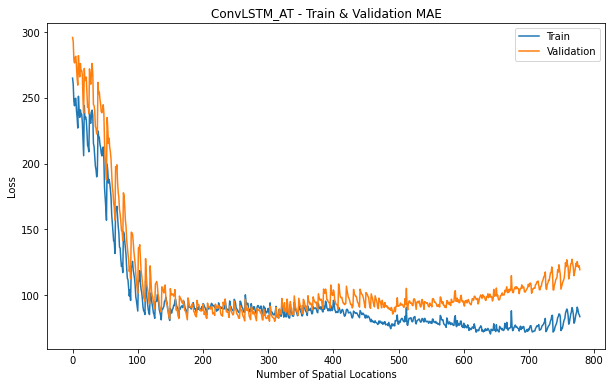

Minimum loss of 70.49319458007812 reached at epoch 641
Maximum loss of 264.91046142578125 reached at epoch 0
Average training loss:  96.7290659599647
Minimum validation loss of 80.11598205566406 reached at epoch 310
Maximum validation loss of 295.83636474609375 reached at epoch 0
Average validation loss:  111.38695188235869


In [ ]:
plot_loss(history_all, f'{project_name} - Train & Validation MAE')

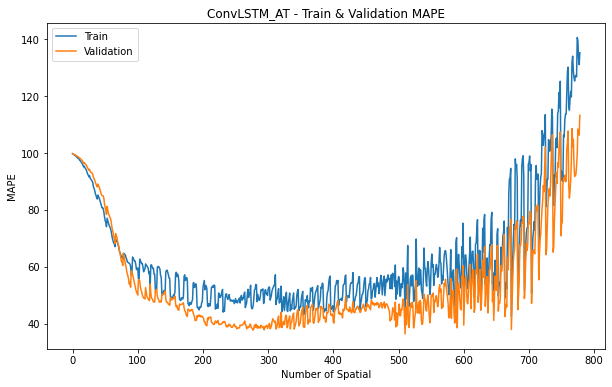

Minimum MAPE of 42.56914138793945 reached at epoch 673
Maximum MAPE of 140.6594696044922 reached at epoch 774
Average training MAPE:  62.80480523654218
Minimum validation MAPE of 36.37103271484375 reached at epoch 510
Maximum validation MAPE of 113.30841827392578 reached at epoch 778
Average validation MAPE:  54.72341721109922


In [ ]:
plot_metrics_mape(history_all, f'{project_name} - Train & Validation MAPE')

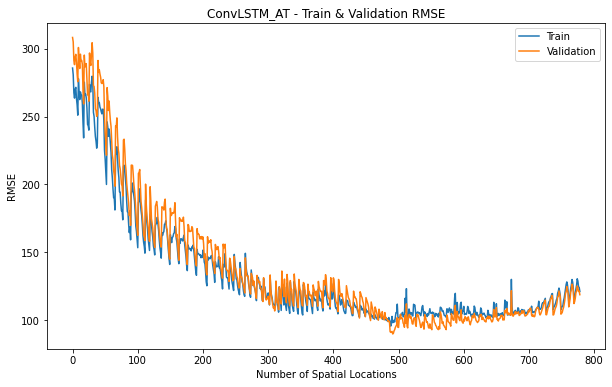

Minimum RMSE of 95.5033950805664 reached at epoch 488
Maximum RMSE of 285.8815002441406 reached at epoch 0
Average training RMSE:  134.06088228433828
Minimum validation RMSE of 89.7129898071289 reached at epoch 491
Maximum validation RMSE of 308.43890380859375 reached at epoch 0
Average validation RMSE:  137.72379302978516


In [ ]:
plot_metrics_rmse(history_all, f'{project_name} - Train & Validation RMSE')

In [ ]:
evaluation = []
for s in range (0,779):
  evaluated_LSTM = model.evaluate(xtest_adjust_3D[s], y_test[s])
  evaluation.append(evaluated_LSTM)

3/3 [==============================] - 0s 4ms/step - loss: 97.7999 - mean_absolute_percentage_error: 108.9603 - root_mean_squared_error: 121.3462


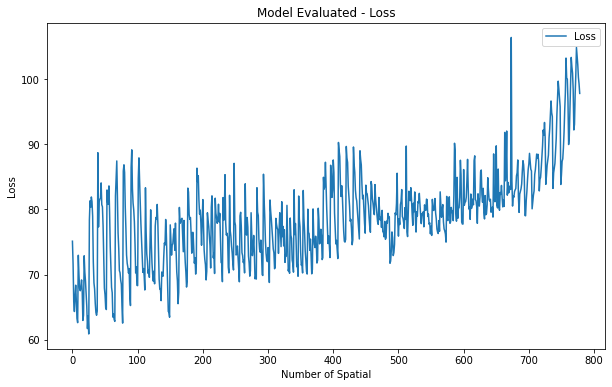

minimum Loss:  60.8867301940918
maximum Loss:  106.38284301757812
minimum Loss at epoch:  25
average:  78.82297009528065


In [ ]:

# evaluation.shape

evaluation_array = np.array(evaluation)
# evaluation_flatten= evaluation_array.flatten()
evaluation_array.shape
eva = np.hsplit(evaluation_array,3)
eva[0]

plt.figure(figsize=(10,6))
plt.plot(eva[0], label='Loss')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Loss')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('minimum Loss: ', np.min(eva[0]))
print('maximum Loss: ', np.max(eva[0]))
print('minimum Loss at epoch: ',np.argmin(eva[0]))
print('average: ', np.mean(eva[0]))

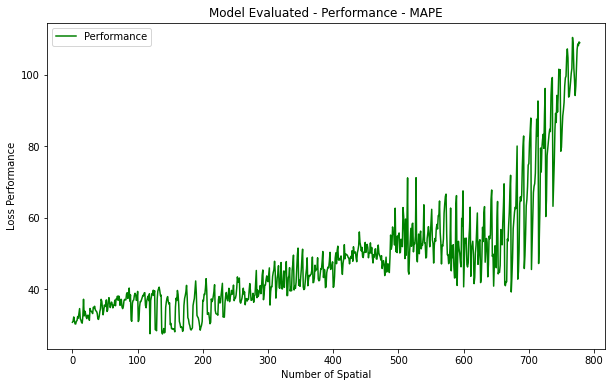

minimum MAPE:  27.555448532104492
maximum MAPE:  110.4402084350586
minimum MAPE at epoch:  138
average:  48.58968980321529


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(eva[1], label='Performance', color='green')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Performance - MAPE')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss Performance')
plt.legend()
plt.show()
print('minimum MAPE: ', np.min(eva[1]))
print('maximum MAPE: ', np.max(eva[1]))
print('minimum MAPE at epoch: ',np.argmin(eva[1]))
print('average: ', np.mean(eva[1]))

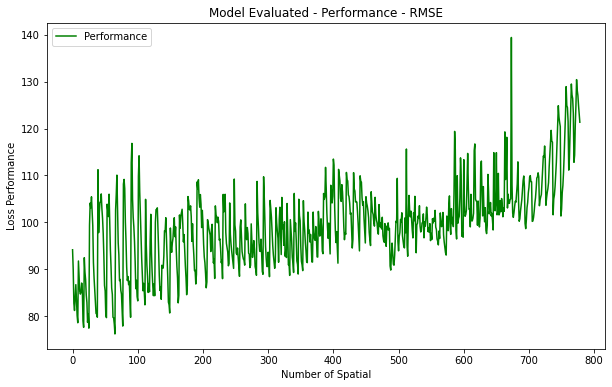

minimum RMSE:  76.18561553955078
maximum RMSE:  139.42697143554688
minimum RMSE at epoch:  65
average:  99.55578870859011


In [ ]:
plt.figure(figsize=(10,6))
plt.plot(eva[2], label='Performance', color='green')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Performance - RMSE')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss Performance')
plt.legend()
plt.show()
print('minimum RMSE: ', np.min(eva[2]))
print('maximum RMSE: ', np.max(eva[2]))
print('minimum RMSE at epoch: ',np.argmin(eva[2]))
print('average: ', np.mean(eva[2]))

#Saving Model

In [ ]:
model.save(f'/content/drive/MyDrive/Renald/Project Manual/save_model/{project_name}.h5')

#Load Model

In [ ]:
from tensorflow.keras.models import load_model
 
# load model
new_model = load_model(f'/content/drive/MyDrive/Renald/Project Manual/save_model/{project_name}.h5', 
                       custom_objects={'attention_layer': attention_layer})
# summarize model.
model.summary()

# from keras.utils import CustomObjectScope

# with CustomObjectScope({'AttentionLayer': Attention}):
#     model = load_model(f'/content/drive/MyDrive/Renald/Project Manual/save_model/{project_name}.h5')

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 12, 9)]      0           []                               
                                                                                                  
 conv1d (Conv1D)                (None, 12, 32)       320         ['input_1[0][0]']                
                                                                                                  
 lstm (LSTM)                    (None, 12, 32)       5376        ['input_1[0][0]']                
                                                                                                  
 global_average_pooling1d (Glob  (None, 32)          0           ['conv1d[0][0]']                 
 alAveragePooling1D)                                                                          

In [ ]:
new_history_all = []
for q in range(0,779):
  print('index: ',q)
  LSTM_history = new_model.fit(xtrain_adjust_3D[q], y_train[q],epochs=1, batch_size=32,validation_data=(xval_adjust_3D[q], y_val[q]), 
             verbose=2, shuffle=False)
  new_history_all.append(LSTM_history)

In [ ]:
plot_loss(new_history_all, f'{project_name} - Train & Validation MAE')

In [ ]:
plot_metrics_mape(new_history_all, f'{project_name} - Train & Validation MAPE')

In [ ]:
plot_metrics_rmse(new_history_all, f'{project_name} - Train & Validation RMSE')

In [ ]:
new_evaluation = []
for s in range (0,779):
  evaluated_LSTM = new_model.evaluate(xtest_adjust_3D[s], y_test[s])
  new_evaluation.append(evaluated_LSTM)

In [ ]:

# evaluation.shape

evaluation_array = np.array(new_evaluation)
# evaluation_flatten= evaluation_array.flatten()
evaluation_array.shape
eva = np.hsplit(evaluation_array,3)
eva[0]

plt.figure(figsize=(10,6))
plt.plot(eva[0], label='Loss')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Loss')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss')
plt.legend()
plt.show()
print('minimum Loss: ', np.min(eva[0]))
print('maximum Loss: ', np.max(eva[0]))
print('minimum Loss at epoch: ',np.argmin(eva[0]))
print('average: ', np.mean(eva[0]))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(eva[1], label='Performance', color='green')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Performance - MAPE')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss Performance')
plt.legend()
plt.show()
print('minimum MAPE: ', np.min(eva[1]))
print('maximum MAPE: ', np.max(eva[1]))
print('minimum MAPE at epoch: ',np.argmin(eva[1]))
print('average: ', np.mean(eva[1]))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(eva[2], label='Performance', color='green')
# plt.plot(len(eva[0]), label='Performance')
plt.title('Model Evaluated - Performance - RMSE')
plt.xlabel('Number of Spatial')
plt.ylabel('Loss Performance')
plt.legend()
plt.show()
print('minimum RMSE: ', np.min(eva[2]))
print('maximum RMSE: ', np.max(eva[2]))
print('minimum RMSE at epoch: ',np.argmin(eva[2]))
print('average: ', np.mean(eva[2]))